In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

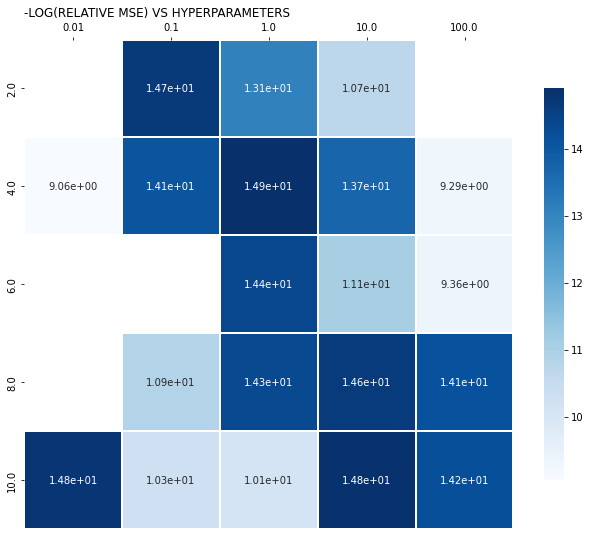

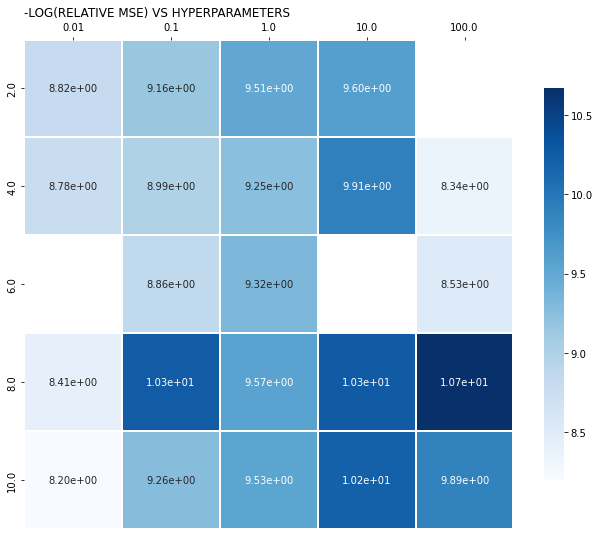

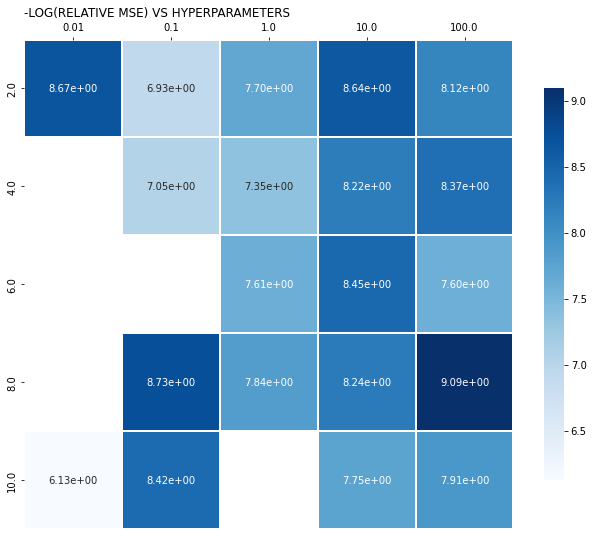

In [4]:
DATASETS = ['SIMULATION_00_03', 'SIMULATION_00_10', 'SIMULATION_10_20', 'SIMULATION_00_20', 'SIMULATION_00_40']
MODELS = ['PIDNN_200', 'PIDNN_400', 'PIDNN_800', 'PIDNN_1600', 'FF_200', 'FF_400', 'FF_800', 'FF_1600']
model = MODELS[3]






for noise in [0,5,10]:
    df = pd.read_csv(f'../Models/SEED_1234/Noise_{noise}/{DATASET}/{MODEL}.csv', sep=',', index_col=0)
    df.loc[df['Validation Error']>0.1, 'Validation Error'] = np.NAN
    # print(df)
    cm = (df['N_f']/df['N_u']).drop_duplicates().tolist()
    alphas = df['alpha'].drop_duplicates().tolist()
    cm = [str(c) for c in cm]
#     cm.reverse()
    alphas = [str(a) for a in alphas]
    lin_table = np.array(df['Validation Error'].tolist()).reshape(len(cm),-1)
    lin_table = -np.log(lin_table)
#     lin_table = lin_table[::-1, :]
    # figure
    fig, ax = plt.subplots(figsize=(11, 9))
    # plot heatmap
    sb.heatmap(lin_table, cmap="Blues", square=True,
            linewidth=0.3, cbar_kws={"shrink": .8}, annot=True, fmt=".2e")
    # xticks
    ax.xaxis.tick_top()
    plt.xticks(np.arange(len(alphas)) + .5, labels=alphas)
    plt.yticks(np.arange(len(cm)) + .5, labels=cm)
    # axis labels
    plt.xlabel('')
    plt.ylabel('')
    # title
    title = '-log(Relative MSE) vs Hyperparameters'.upper()
    plt.title(title, loc='left')
    plt.show()

In [ ]:

# fig, ax = plt.subplots()
# im = ax.imshow(-np.log(lin_table), cmap = 'autumn' , interpolation = 'nearest' )

# # Show all ticks and label them with the respective list entries
# ax.set_xticks(np.arange(len(alphas)), labels=alphas)
# ax.set_yticks(np.arange(len(cm)), labels=cm)

# # Rotate the tick labels and set their alignment.
# plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
#          rotation_mode="anchor")

# # Loop over data dimensions and create text annotations.
# for i in range(len(cm)):
#     for j in range(len(alphas)):
#         text = ax.text(j, i, "{:.2e}".format(lin_table[i, j]),
#                        ha="center", va="center", color="b")

# ax.set_title("Harvest of local cm (in tons/year)")
# fig.tight_layout()
# plt.show()